### Visualización

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


In [3]:
df['VisitaHora_Fin'] = pd.to_datetime(df['VisitaHora_Fin'])
df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])
df['Demora_Inicio_Fin'] = round((df['VisitaHora_Fin'] - df['VisitaHora_Inicio']).dt.seconds.div(60),2)

In [4]:
df.head(5)

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,2024-10-14 14:13:53,2024-10-14 14:14:53,1.00
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,2024-10-14 16:43:00,2024-10-14 16:43:00,0.00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,2024-10-14 09:41:36,2024-10-14 09:50:08,8.53
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,2024-10-14 13:32:55,2024-10-14 13:39:55,7.00
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,2024-10-14 15:36:00,2024-10-14 15:36:00,0.00


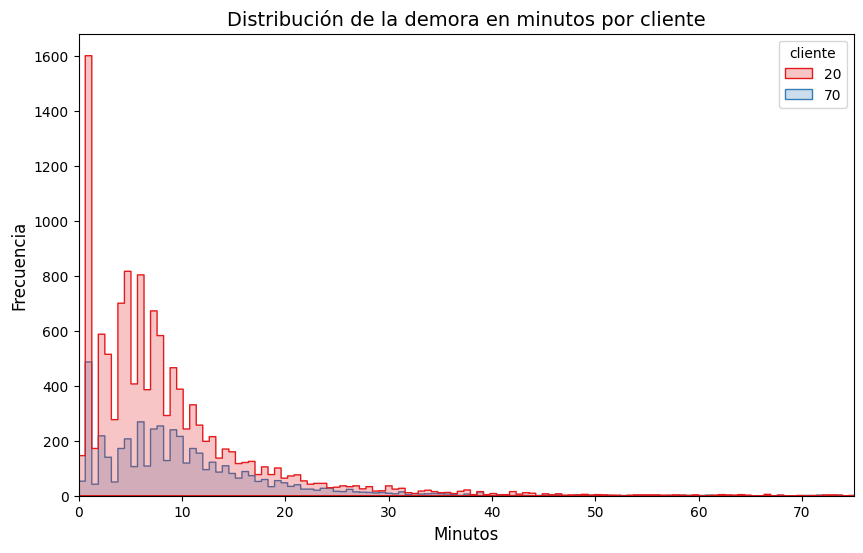

In [5]:
# Grafico de la distribución de la demora de cada cliente
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['VisitaHora_Inicio']!=df['VisitaHora_Fin']], x='Demora_Inicio_Fin', hue='cliente', element="step", palette="Set1")

plt.title('Distribución de la demora en minutos por cliente', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0,75)
plt.show()

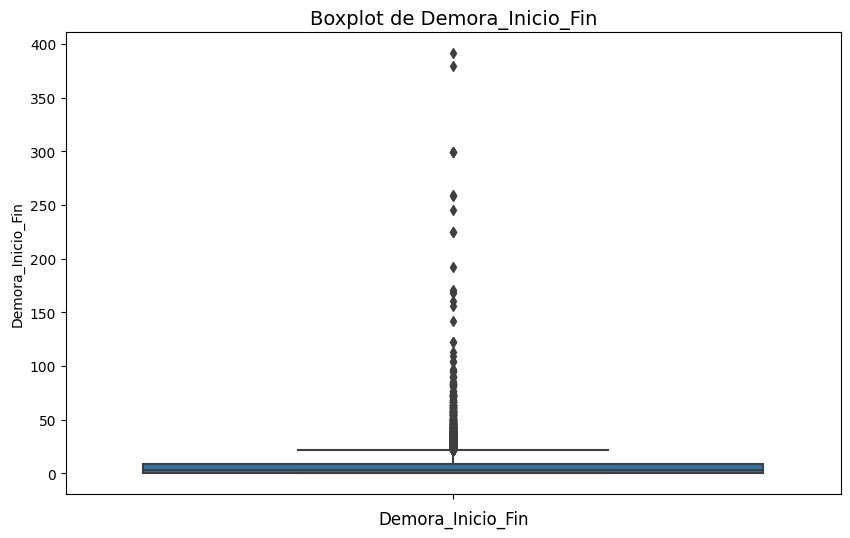

In [6]:
# Boxplot de la distribucion de los minutos de demora (Para ver si hay muchos outliers)
plt.figure(figsize=(10, 6))

sns.boxplot(y='Demora_Inicio_Fin', data=df)

plt.title('Boxplot de Demora_Inicio_Fin', fontsize=14)
plt.xlabel('Demora_Inicio_Fin', fontsize=12)

plt.show()

In [7]:
# Vamos a filtrar los outliers que aparecen en el boxplot y veamoslos más detalladamente

Q1 = df['Demora_Inicio_Fin'].quantile(0.25)
Q3 = df['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Creamos dos dataframes: uno sin los outliers y otro de solo los outliers
df_sin_outliers = df[(df['Demora_Inicio_Fin'] >= limite_inferior) & (df['Demora_Inicio_Fin'] <= limite_superior)]
df_outliers = df[(df['Demora_Inicio_Fin'] <= limite_inferior) | (df['Demora_Inicio_Fin'] >= limite_superior)]

df_outliers.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
40,74965,RICARDO GUTIERREZ 4220,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa Devoto,901,1401,-34.602324,-58.512621,70,...,10.470,45,2024-06-03,Monday,12:13:00,2024-06-03,Monday,2024-10-14 14:08:42,2024-10-14 14:33:01,24.32
55,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,18.960,42,2024-05-10,Friday,12:09:00,2024-05-10,Friday,2024-10-14 12:53:54,2024-10-14 13:24:37,30.72
63,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,10.820,33,2024-07-18,Thursday,12:09:00,2024-07-18,Thursday,2024-10-14 15:57:27,2024-10-14 16:24:14,26.78
69,74974,AV LARRAZABAL 804,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.646917,-58.507466,70,...,13.500,2,2024-06-20,Thursday,12:45:00,2024-06-20,Thursday,2024-10-14 14:09:32,2024-10-14 14:38:50,29.30
122,74981,CORVALAN 457,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.643096,-58.504276,70,...,17.218,44,2024-06-20,Thursday,12:28:00,2024-06-20,Thursday,2024-10-14 13:02:20,2024-10-14 13:30:32,28.20


In [8]:
# fijarse de hacer boxplots por municipio de la demora
# ver tema de comparacion de demora por promedios

In [9]:
df_outliers.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
40,74965,RICARDO GUTIERREZ 4220,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa Devoto,901,1401,-34.602324,-58.512621,70,...,10.470,45,2024-06-03,Monday,12:13:00,2024-06-03,Monday,2024-10-14 14:08:42,2024-10-14 14:33:01,24.32
55,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,18.960,42,2024-05-10,Friday,12:09:00,2024-05-10,Friday,2024-10-14 12:53:54,2024-10-14 13:24:37,30.72
63,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,10.820,33,2024-07-18,Thursday,12:09:00,2024-07-18,Thursday,2024-10-14 15:57:27,2024-10-14 16:24:14,26.78
69,74974,AV LARRAZABAL 804,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.646917,-58.507466,70,...,13.500,2,2024-06-20,Thursday,12:45:00,2024-06-20,Thursday,2024-10-14 14:09:32,2024-10-14 14:38:50,29.30
122,74981,CORVALAN 457,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.643096,-58.504276,70,...,17.218,44,2024-06-20,Thursday,12:28:00,2024-06-20,Thursday,2024-10-14 13:02:20,2024-10-14 13:30:32,28.20


In [10]:
df_outliers.direccion.value_counts()

A. ALSINA 1556                      12
AIME PAINE 1130                     10
SAN NICOLAS 4865                     8
MEMBRILLAR 375                       8
BULNES 1596                          7
                                    ..
AV INDEPENDENCIA 2242                1
PICHINCHA 770                        1
AV. JUAN BAUTISTA Alberdi 4801 0     1
J B ALBERDI 4799                     1
GURRUCHAGA 2137                      1
Name: direccion, Length: 902, dtype: int64

In [11]:
df_outliers.localidad.value_counts()

Balvanera        85
Almagro          82
Flores           73
Belgrano         65
Recoleta         64
                 ..
Florida Oeste     2
Acasusso          1
Villa Raffo       1
La Plata          1
Quilmes           1
Name: localidad, Length: 69, dtype: int64

In [12]:
df_outliers.municipio.value_counts()

Comuna 1           280
Comuna 13          115
Comuna 3           105
Comuna 5           101
Comuna 7            94
Comuna 15           73
Comuna 2            64
Comuna 14           62
Comuna 11           54
Comuna 12           51
Comuna 4            47
Comuna 6            46
Comuna 10           44
San Isidro          40
Vicente López       38
Comuna 9            30
San Fernando        13
Comuna 8            12
Tigre                8
Avellaneda           2
Tres de Febrero      1
La Plata             1
Quilmes              1
Name: municipio, dtype: int64

In [13]:
df_outliers.query('localidad == "Balvanera"')
# ANALIZAR ESTOS CASOS DE DEMORAS EXTREMAS OUTLIERS

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
1195,75258,SANN LUIS 2626,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.600043,-58.403514,20,...,273.00,23,2024-05-21,Tuesday,12:53:00,2024-05-21,Tuesday,2024-10-14 10:21:00,2024-10-14 16:40:19,379.32
1197,75258,SANN LUIS 2626,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.600043,-58.403514,20,...,167.60,17,2024-06-05,Wednesday,12:23:00,2024-06-05,Wednesday,2024-10-14 13:17:33,2024-10-14 13:39:56,22.38
1468,75366,AVDA CORDOBA 2601,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.598353,-58.403748,20,...,40.00,8,2024-06-18,Tuesday,12:15:00,2024-06-18,Tuesday,2024-10-14 13:56:17,2024-10-14 14:30:39,34.37
1470,75366,AVDA CORDOBA 2601,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.598353,-58.403748,20,...,46.50,9,2024-06-26,Wednesday,13:07:00,2024-06-26,Wednesday,2024-10-14 09:55:59,2024-10-14 10:23:14,27.25
1475,75366,AVDA CORDOBA 2601,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.598353,-58.403748,20,...,35.00,7,2024-07-31,Wednesday,12:11:00,2024-07-31,Wednesday,2024-10-14 13:14:39,2024-10-14 13:36:53,22.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,179582,MORENO 2598,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.613423,-58.403038,20,...,55.00,6,2024-06-11,Tuesday,12:25:00,2024-06-11,Tuesday,2024-10-14 13:23:40,2024-10-14 13:52:55,29.25
27113,179582,MORENO 2598,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.613423,-58.403038,20,...,0.00,1,2024-06-11,Tuesday,12:25:00,2024-06-11,Tuesday,2024-10-14 13:23:40,2024-10-14 13:52:55,29.25
27184,179862,ALBERTI 333,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.613652,-58.401506,70,...,35.74,83,2024-07-12,Friday,12:10:00,2024-07-12,Friday,2024-10-14 12:15:39,2024-10-14 12:40:12,24.55
27435,182310,BOULOGNE SUR MER 619,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.602924,-58.406159,20,...,99.00,10,2024-07-24,Wednesday,12:09:00,2024-07-24,Wednesday,2024-10-14 14:08:50,2024-10-14 14:31:57,23.12


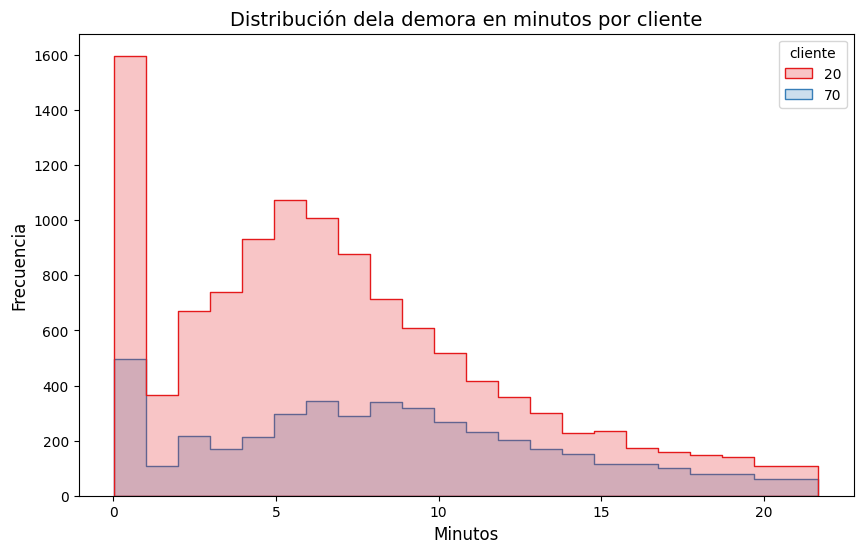

In [14]:
# HACER POR PROPORCION NO POR FRECUENCIA
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'df', la columna con las categorías 'categoria' y la columna con los valores 'valores'
plt.figure(figsize=(10, 6))

# Usamos histplot para las distribuciones de cada categoría
sns.histplot(data=df_sin_outliers[df_sin_outliers['VisitaHora_Inicio']!=df_sin_outliers['VisitaHora_Fin']], x='Demora_Inicio_Fin', hue='cliente', element="step", palette="Set1", bins=22)

# Títulos y etiquetas
plt.title('Distribución dela demora en minutos por cliente', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# plt.xlim(0,75)
plt.show()


In [15]:
print(len(df[df['Demora_Inicio_Fin']==0]))
print(len(df[df['Demora_Inicio_Fin']!=0]))

10251
17233


In [16]:
deciles = df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
print(deciles)
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mode())
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mean())
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].median())

0.10     1.00
0.20     2.92
0.30     4.42
0.40     5.92
0.50     7.00
0.60     8.65
0.70    10.58
0.80    13.55
0.90    19.13
0.95    25.97
Name: Demora_Inicio_Fin, dtype: float64
0    1.0
Name: Demora_Inicio_Fin, dtype: float64
9.547540888190444
7.0


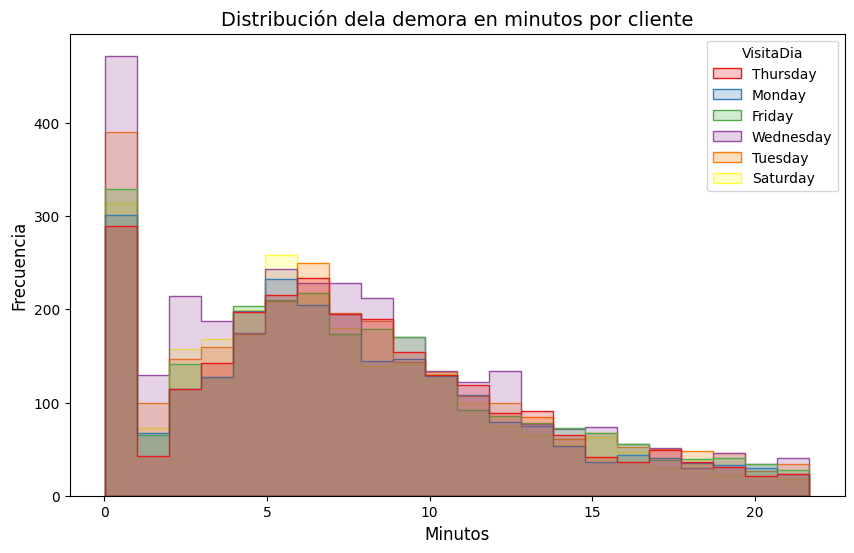

In [17]:
# Supongamos que tu DataFrame se llama 'df', la columna con las categorías 'categoria' y la columna con los valores 'valores'
plt.figure(figsize=(10, 6))

# Usamos histplot para las distribuciones de cada categoría
sns.histplot(data=df_sin_outliers[df_sin_outliers['VisitaHora_Inicio']!=df_sin_outliers['VisitaHora_Fin']], x='Demora_Inicio_Fin', hue='VisitaDia', element="step", palette="Set1", bins=22)

# Títulos y etiquetas
plt.title('Distribución dela demora en minutos por cliente', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# plt.xlim(0,75)
plt.show()


In [18]:
df.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().sort_values()

VisitaDia
Sunday       0.000000
Saturday     5.619144
Friday       5.691604
Thursday     5.749695
Wednesday    6.094171
Monday       6.254371
Tuesday      6.391865
Name: Demora_Inicio_Fin, dtype: float64

In [19]:
asd2 = df.VisitaDia.value_counts()
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el DataFrame con el nuevo orden del índice
df_sorted = asd2.reindex(dias_semana)
df_sorted

Monday       4072
Tuesday      4927
Wednesday    5572
Thursday     4168
Friday       4471
Saturday     4219
Sunday          3
Name: VisitaDia, dtype: int64

In [20]:
asd2 = df[df['cliente']==20].VisitaDia.value_counts()
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el DataFrame con el nuevo orden del índice
df_sorted = asd2.reindex(dias_semana)
df_sorted

Monday       2632
Tuesday      3027
Wednesday    3523
Thursday     2365
Friday       2525
Saturday     2477
Sunday          3
Name: VisitaDia, dtype: int64

In [21]:
asd2 = df[df['cliente']==70].VisitaDia.value_counts()
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el DataFrame con el nuevo orden del índice
df_sorted = asd2.reindex(dias_semana)
df_sorted

Monday       1440.0
Tuesday      1900.0
Wednesday    2049.0
Thursday     1803.0
Friday       1946.0
Saturday     1742.0
Sunday          NaN
Name: VisitaDia, dtype: float64

In [22]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'direccion'
mean_demora = df.groupby('direccion')['Demora_Inicio_Fin'].mean().sort_values(ascending=False).reset_index()

# Contar las ocurrencias de 'direccion'
count_direccion = df['direccion'].value_counts().sort_values(ascending=False).reset_index()

# Renombrar las columnas del DataFrame de conteo para que tengan nombres coherentes
count_direccion.columns = ['direccion', 'count']

# Hacer el merge de ambos DataFrames utilizando la columna 'direccion'
merged_df = pd.merge(mean_demora, count_direccion, on='direccion')
merged_df.sort_values(by='count',ascending=False)

,direccion,Demora_Inicio_Fin,count
3907,AV. CALLAO 1690,3.413750,32
558,Posadas 1245,13.180741,30
1292,25 DE MAYO 764,8.760690,29
1705,LA PAMPA 5201,7.476923,26
3345,HELGUERA 4102,4.306923,26
...,...,...,...
2883,HUMAHUACA 4399,5.000000,1
2882,ROQUE SAENZ PE#A 1115,5.000000,1
2881,CARLOS CALVO 4141,5.000000,1
2880,AV SCALABRINI ORTIZ 2467,5.000000,1


In [23]:
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,2024-10-14 14:13:53,2024-10-14 14:14:53,1.00
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,2024-10-14 16:43:00,2024-10-14 16:43:00,0.00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,2024-10-14 09:41:36,2024-10-14 09:50:08,8.53
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,2024-10-14 13:32:55,2024-10-14 13:39:55,7.00
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,2024-10-14 15:36:00,2024-10-14 15:36:00,0.00


In [24]:
df.groupby('provincia')['Demora_Inicio_Fin'].mean().sort_values()

provincia
Ciudad Autónoma de Buenos Aires    5.970334
Buenos Aires                       6.097160
Name: Demora_Inicio_Fin, dtype: float64

In [52]:
df[df['Demora_Inicio_Fin'] != 0].groupby('municipio')['Demora_Inicio_Fin'].mean().sort_values(ascending=False) # ELIMINAR DEMORAS IGUALES A 0

municipio
La Plata               71.720000
Avellaneda             18.321667
Quilmes                13.755000
Comuna 7               11.071682
Comuna 1               10.610004
San Miguel             10.520000
Comuna 3               10.355407
Comuna 8               10.224872
Comuna 11              10.203642
Comuna 5               10.076815
Comuna 4               10.023320
Comuna 10               9.656260
Pilar                   9.650000
Comuna 12               9.585032
General San Martín      9.242941
Comuna 6                9.153971
Tigre                   9.064608
Comuna 13               8.968807
Comuna 15               8.869031
Comuna 2                8.860026
San Isidro              8.831569
Comuna 9                8.804744
San Fernando            8.759789
Comuna 14               8.557985
Tres de Febrero         8.518000
Vicente López           7.350690
La Matanza              6.344444
Escobar                 4.516667
Malvinas Argentinas     1.250000
Name: Demora_Inicio_Fin, dtype: f

In [53]:
df[df['Demora_Inicio_Fin'] != 0].groupby('localidad')['Demora_Inicio_Fin'].mean().sort_values(ascending=False)

localidad
La Plata                      71.720000
Avellaneda                    21.040000
Villa Luzuriaga               19.650000
Nueva Pompeya                 18.384775
Quilmes                       13.755000
                                ...    
El Talar                       3.400000
Rincón de Milberg              2.732500
Lomas del Mirador              1.940000
Ingeniero Adolfo Sourdeaux     1.250000
Ingeniero Maschwitz            1.000000
Name: Demora_Inicio_Fin, Length: 85, dtype: float64

In [54]:
df[df['Demora_Inicio_Fin'] != 0].groupby('mes')['Demora_Inicio_Fin'].mean().sort_values(ascending=False)

mes
Mayo     9.822114
Junio    9.491218
Julio    9.335033
Name: Demora_Inicio_Fin, dtype: float64

In [28]:
df.mes.value_counts()
# los meses en la columna mes no son los mismos que en las fechas, corregir

Julio    9724
Mayo     9119
Junio    8641
Name: mes, dtype: int64

In [55]:
df.cliente.value_counts()

20    16604
70    10880
Name: cliente, dtype: int64

In [30]:
asd = df.VisitaFecha.value_counts().to_frame().reset_index().sort_values(by='index').reset_index(drop=True)
asd = asd.rename(columns={'index':'fecha'})
asd

,fecha,VisitaFecha
0,2024-05-03,351
1,2024-05-04,352
2,2024-05-06,316
3,2024-05-07,476
4,2024-05-08,484
...,...,...
73,2024-07-31,396
74,2024-08-01,342
75,2024-08-02,11
76,2024-08-05,2


In [58]:
asd.sort_values(by='VisitaFecha', ascending=False).head(10)

,fecha,VisitaFecha
15,2024-05-21,539
32,2024-06-11,485
4,2024-05-08,484
3,2024-05-07,476
54,2024-07-10,469
33,2024-06-12,461
34,2024-06-13,449
60,2024-07-17,447
43,2024-06-26,442
37,2024-06-18,442


In [31]:
asd.sort_values(by='VisitaFecha').head(10)
# finde largo en agosto
# 21/07 fue domingo
# 9 de mayo paro general

,fecha,VisitaFecha
77,2024-08-06,1
5,2024-05-09,1
76,2024-08-05,2
64,2024-07-21,3
75,2024-08-02,11
39,2024-06-20,138
58,2024-07-15,280
46,2024-06-29,286
24,2024-06-01,289
25,2024-06-03,297


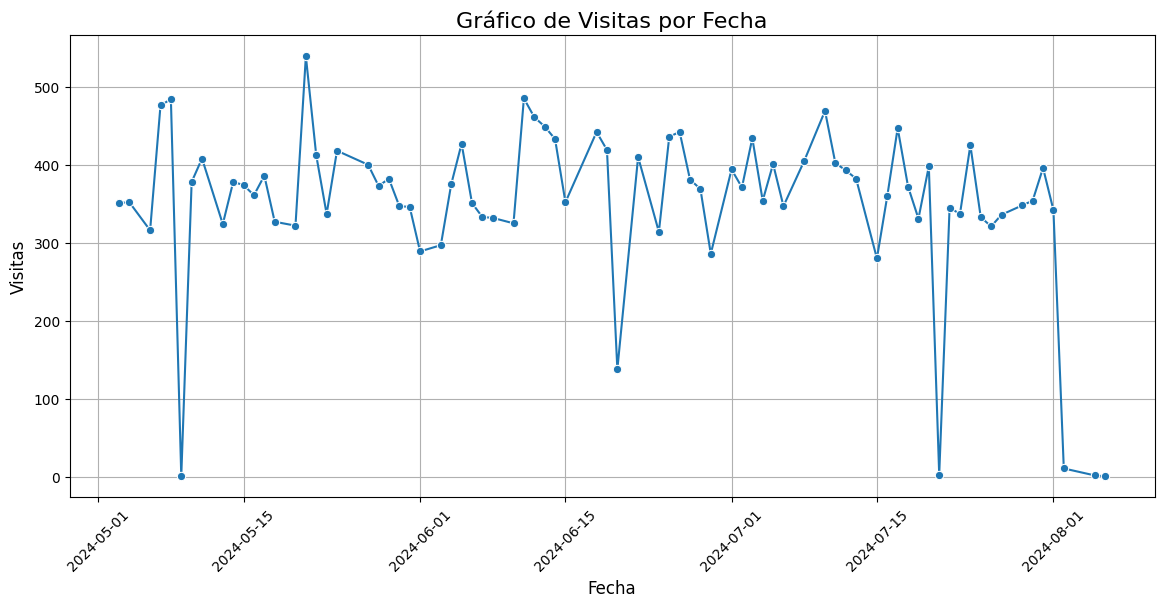

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

asd['fecha'] = pd.to_datetime(asd['fecha'])

# Crear el gráfico de líneas
plt.figure(figsize=(14,6))
sns.lineplot(x='fecha', y='VisitaFecha', data=asd, marker='o')

# Configuración del gráfico
plt.title('Gráfico de Visitas por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Visitas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [33]:
df[['VisitaDia','VisitaFecha']].sort_values(by='VisitaFecha').dropna().drop_duplicates()

,VisitaDia,VisitaFecha
12727,Friday,2024-05-03
16917,Saturday,2024-05-04
22755,Monday,2024-05-06
14099,Tuesday,2024-05-07
12829,Wednesday,2024-05-08
...,...,...
23222,Wednesday,2024-07-31
27231,Thursday,2024-08-01
21913,Friday,2024-08-02
27393,Monday,2024-08-05


In [34]:
df[df.VisitaPlanificadaFecha!=df.VisitaFecha].dropna()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
84,74975,SANABRIA 2536,Ciudad Autónoma de Buenos Aires,Comuna 10,Monte Castro,901,1401,-34.612881,-58.504935,70,...,23.290,49,2024-07-15,Monday,12:34:00,2024-07-17,Wednesday,2024-10-14 17:57:55.010,2024-10-14 17:57:55.010,0.00
808,75144,LASCANO 3302,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.609762,-58.490161,70,...,17.860,22,2024-07-15,Monday,12:01:00,2024-07-17,Wednesday,2024-10-14 17:57:55.010,2024-10-14 17:57:55.010,0.00
1313,75311,E. DE ISRAEL 4558,Ciudad Autónoma de Buenos Aires,Comuna 15,Villa Crespo,901,1401,-34.599427,-58.429644,20,...,165.500,17,2024-07-06,Saturday,12:24:00,2024-07-08,Monday,2024-10-14 16:16:00.000,2024-10-14 16:16:00.000,0.00
1979,75526,BUCARELLI 943,Ciudad Autónoma de Buenos Aires,Comuna 15,Parque Chas,901,1401,-34.590183,-58.475405,20,...,777.600,144,2024-07-25,Thursday,12:01:00,2024-07-29,Monday,2024-10-14 17:10:33.190,2024-10-14 17:10:33.190,0.00
2200,75914,LUIS MARIA CAMPOS 1193,Ciudad Autónoma de Buenos Aires,Comuna 13,Colegiales,901,1401,-34.565335,-58.440256,70,...,43.150,104,2024-07-05,Friday,12:16:00,2024-07-06,Saturday,2024-10-14 16:54:00.000,2024-10-14 16:54:00.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,174665,BOLIVAR 1015,Ciudad Autónoma de Buenos Aires,Comuna 1,San Telmo,901,1401,-34.619769,-58.373015,20,...,9.000,1,2024-07-08,Monday,13:01:00,2024-07-11,Thursday,2024-10-14 08:58:00.000,2024-10-14 08:58:00.000,0.00
26443,175957,BOYERO 1551,Buenos Aires,Malvinas Argentinas,Área de Promoción El Triángulo,901,1401,-34.456751,-58.709863,20,...,41.000,16,2024-05-04,Saturday,12:01:00,2024-05-09,Thursday,2024-10-14 11:22:00.000,2024-10-14 11:22:00.000,0.00
26572,176729,AV MONROE 2676,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.559857,-58.462404,20,...,19.500,2,2024-07-06,Saturday,12:44:00,2024-07-08,Monday,2024-10-14 13:06:22.000,2024-10-14 13:20:22.000,14.00
26752,177922,MISIONES 349,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.613992,-58.404235,70,...,10.265,55,2024-06-26,Wednesday,12:08:00,2024-06-27,Thursday,2024-10-14 16:04:13.000,2024-10-14 16:14:17.000,10.07


In [35]:
df['VisitaHora_Inicio_UNICO'] = df['VisitaHora_Inicio'].dt.hour
df[df['Demora_Inicio_Fin']!=0].groupby('VisitaHora_Inicio_UNICO').Demora_Inicio_Fin.mean()
df[df['Demora_Inicio_Fin']!=0].VisitaHora_Inicio_UNICO.value_counts()

13.0    3595
14.0    3412
12.0    3112
15.0    2288
11.0    2128
10.0     966
16.0     910
9.0      338
17.0     242
8.0      116
7.0       36
18.0      20
19.0       9
20.0       8
6.0        1
Name: VisitaHora_Inicio_UNICO, dtype: int64

In [36]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[df['Demora_Inicio_Fin'] != 0]['VisitaHora_Inicio_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaHora_Inicio_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaHora_Inicio_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_1 = pd.merge(mean_demora, count_horas, on='VisitaHora_Inicio_UNICO')

# Mostrar el resultado final
merged_df_1

,VisitaHora_Inicio_UNICO,Mean_Demora,Count
0,6.0,192.350000,1
1,7.0,13.586667,36
2,8.0,12.395603,116
3,9.0,15.523817,338
4,10.0,12.323282,966
5,11.0,11.360681,2128
6,12.0,10.007686,3112
7,13.0,8.940860,3595
8,14.0,8.666295,3412
9,15.0,8.176954,2288


In [37]:
merged_df_1.Count = merged_df_1.Count.div(merged_df_1.Count.sum())
merged_df_1.VisitaHora_Inicio_UNICO = merged_df_1.VisitaHora_Inicio_UNICO.astype(int)

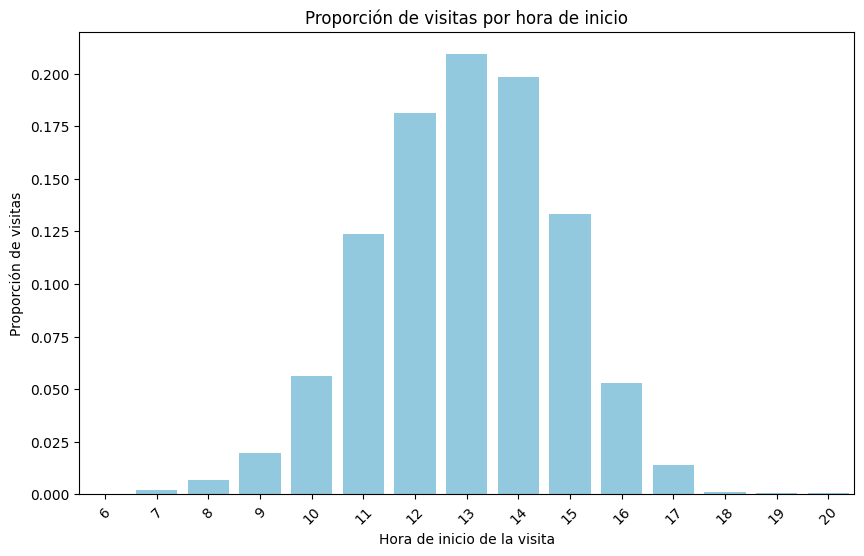

In [38]:
# VER EN CASO QUE INCLUYA LOS 10MIL CON DEMORA 0
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Count', data=merged_df_1, color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Proporción de visitas')
plt.title('Proporción de visitas por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


In [59]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby(['cliente','VisitaHora_Inicio_UNICO'])['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[df['Demora_Inicio_Fin'] != 0][['cliente','VisitaHora_Inicio_UNICO']].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['cliente','VisitaHora_Inicio_UNICO', 'Mean_Demora']
count_horas.columns = ['cliente','VisitaHora_Inicio_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_11 = pd.merge(mean_demora, count_horas, on=['cliente','VisitaHora_Inicio_UNICO'])

# # Mostrar el resultado final
merged_df_12 = merged_df_11.copy()
merged_df_11.loc[merged_df_11['cliente'] == 20, 'Count'] = merged_df_11.loc[merged_df_11['cliente'] == 20, 'Count'].div(merged_df_11.loc[merged_df_11['cliente'] == 20, 'Count'].sum())
merged_df_11.loc[merged_df_11['cliente'] == 70, 'Count'] = merged_df_11.loc[merged_df_11['cliente'] == 70, 'Count'].div(merged_df_11.loc[merged_df_11['cliente'] == 70, 'Count'].sum())
merged_df_12

,cliente,VisitaHora_Inicio_UNICO,Mean_Demora,Count
0,20,6.0,192.350000,1
1,20,7.0,9.745600,25
2,20,8.0,11.801264,87
3,20,9.0,16.362429,247
4,20,10.0,11.287041,757
5,20,11.0,10.496350,1537
6,20,12.0,9.395735,2176
7,20,13.0,8.579134,2552
8,20,14.0,8.230377,2386
9,20,15.0,7.792629,1632


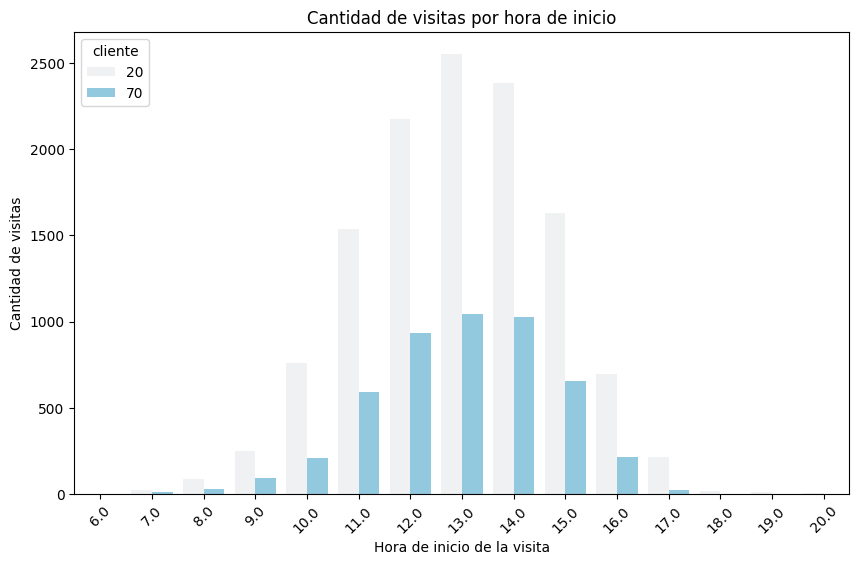

In [60]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Count', hue='cliente', data=merged_df_12, color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Cantidad de visitas')
plt.title('Cantidad de visitas por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


In [61]:
# SEGUIR ACAAAAA
df[['cliente','VisitaHora_Inicio_UNICO']].groupby(['cliente', 'VisitaHora_Inicio_UNICO']).value_counts().unstack().T

cliente,20,70
VisitaHora_Inicio_UNICO,,
6.0,1.0,NaN
7.0,25.0,11.0
8.0,87.0,29.0
9.0,247.0,91.0
10.0,757.0,209.0
11.0,1537.0,591.0
12.0,2176.0,936.0
13.0,2552.0,1043.0
14.0,2386.0,1026.0


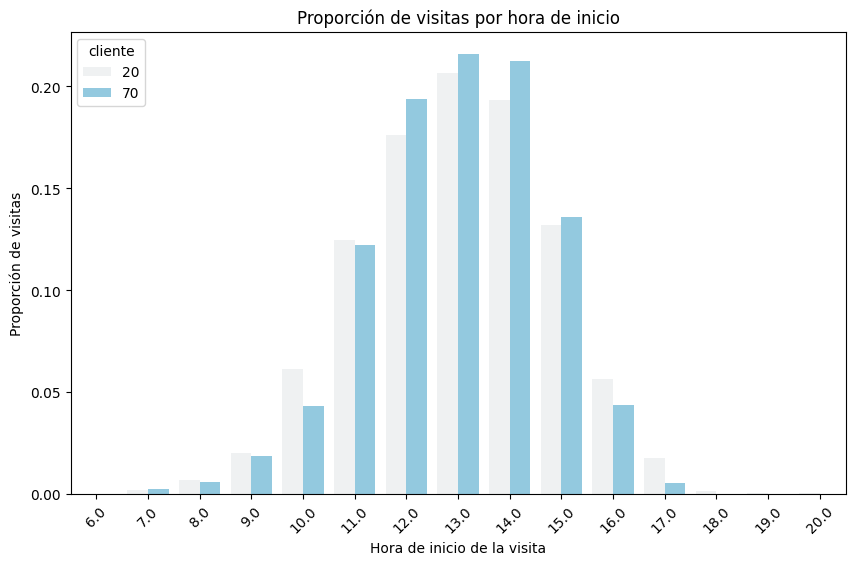

In [34]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Count', hue='cliente', data=merged_df_11, color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Proporción de visitas')
plt.title('Proporción de visitas por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

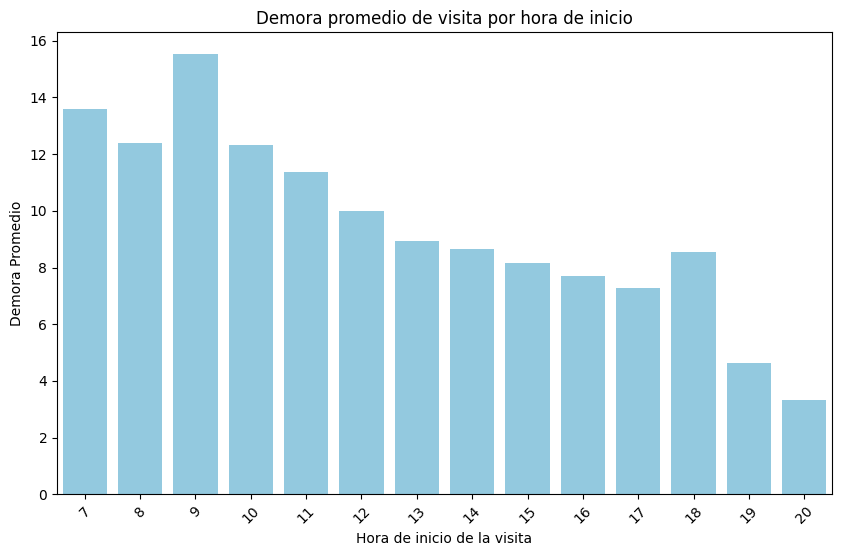

In [35]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Mean_Demora', data=merged_df_1[1:], color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Demora Promedio')
plt.title('Demora promedio de visita por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


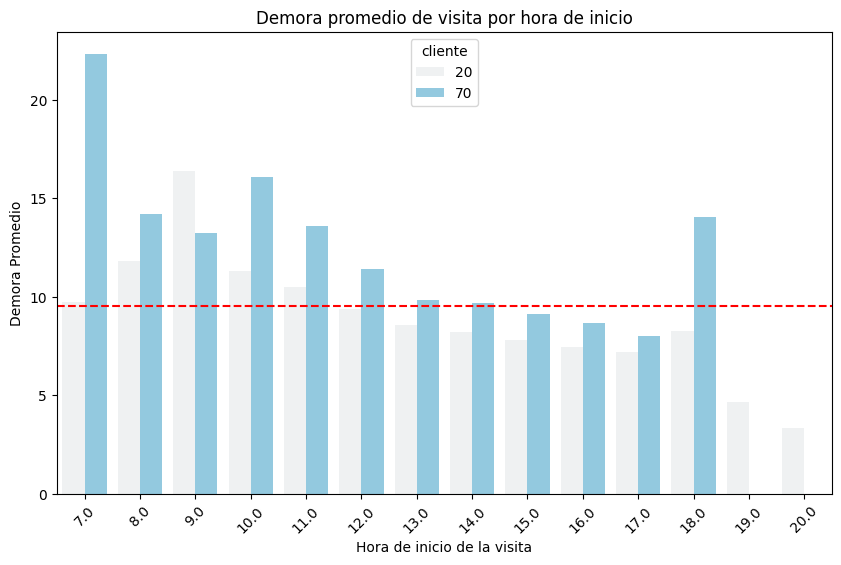

In [36]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Mean_Demora', hue='cliente', data=merged_df_11[1:], color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Demora Promedio')
plt.title('Demora promedio de visita por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)
plt.axhline(y=9.55, color='r', linestyle='--')

# Mostramos el gráfico
plt.show()


In [37]:
df[df.Demora_Inicio_Fin!=0].Demora_Inicio_Fin.mean()

9.547540888190444

In [38]:
df[df.Demora_Inicio_Fin!=0].Demora_Inicio_Fin.median()

7.0

In [39]:
# VER POR PRIMERA, SEGUNDA, TERCERA... SEMANA DEL MES
df['VisitaDia_UNICO'] = pd.to_datetime(df['VisitaFecha']).dt.day
df['VisitaDia_UNICO'] = df['VisitaDia_UNICO'].replace(31,30)
df.head()
df[df['Demora_Inicio_Fin']!=0].groupby('VisitaDia_UNICO').Demora_Inicio_Fin.mean()
df[df['Demora_Inicio_Fin']!=0].VisitaDia_UNICO.value_counts()

30.0    882
22.0    831
8.0     826
18.0    805
11.0    781
10.0    746
24.0    743
13.0    712
4.0     689
6.0     666
3.0     661
27.0    651
1.0     629
29.0    604
15.0    603
20.0    536
5.0     524
12.0    516
16.0    515
17.0    507
25.0    501
19.0    489
26.0    462
14.0    461
28.0    457
7.0     444
23.0    391
21.0    309
2.0     240
Name: VisitaDia_UNICO, dtype: int64

In [40]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[df['Demora_Inicio_Fin'] != 0]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,9.854038,629
1,2.0,9.902125,240
2,3.0,10.274024,661
3,4.0,9.978955,689
4,5.0,9.359256,524
5,6.0,9.002492,666
6,7.0,9.258604,444
7,8.0,9.886320,826
8,10.0,9.481367,746
9,11.0,9.340090,781


In [41]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 20)].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 20)]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,8.674788,449
1,2.0,9.950323,155
2,3.0,9.595289,467
3,4.0,9.450086,466
4,5.0,9.238997,369
5,6.0,7.958612,425
6,7.0,9.463484,287
7,8.0,9.581463,629
8,10.0,9.007758,513
9,11.0,9.000769,598


In [42]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 70)].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 70)]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,12.795611,180
1,2.0,9.814235,85
2,3.0,11.907887,194
3,4.0,11.084126,223
4,5.0,9.645548,155
5,6.0,10.843361,241
6,7.0,8.884076,157
7,8.0,10.859695,197
8,10.0,10.524120,233
9,11.0,10.448907,183


In [43]:
df[df['Demora_Inicio_Fin']!=0].Demora_Inicio_Fin.describe()

count    17181.000000
mean         9.547541
std         11.982111
min          0.020000
25%          3.820000
50%          7.000000
75%         11.980000
max        391.070000
Name: Demora_Inicio_Fin, dtype: float64

In [44]:
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin,VisitaHora_Inicio_UNICO,VisitaDia_UNICO
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,2024-10-07 14:13:53,2024-10-07 14:14:53,1.00,14.0,23.0
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-10,Friday,12:05:00,2024-05-10,Friday,2024-10-07 16:43:00,2024-10-07 16:43:00,0.00,16.0,10.0
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,2024-10-07 09:41:36,2024-10-07 09:50:08,8.53,9.0,30.0
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,2024-10-07 13:32:55,2024-10-07 13:39:55,7.00,13.0,13.0
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,2024-10-07 15:36:00,2024-10-07 15:36:00,0.00,15.0,27.0


In [46]:
df.localidad.value_counts().head(10)

Palermo         1938
Recoleta        1846
Belgrano        1365
Balvanera       1295
Almagro         1176
Caballito       1083
Villa Crespo     991
Flores           979
San Nicolás      960
Colegiales       885
Name: localidad, dtype: int64

In [56]:
df.groupby('cliente').localidad.value_counts().unstack().T.sort_values(by=20, ascending=False).head(15)

cliente,20,70
localidad,,
Palermo,1252.0,686.0
Recoleta,1205.0,641.0
Balvanera,913.0,382.0
Belgrano,855.0,510.0
San Nicolás,762.0,198.0
Almagro,701.0,475.0
Retiro,683.0,156.0
Villa Crespo,632.0,359.0
Caballito,554.0,529.0
